# Red Wine Quality Prediction


**Problem Statement:**

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

# Importing Libraries 

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
import warnings
warnings.filterwarnings("ignore")

# Importing CSV & creating DataFrame

In [123]:
wdf = pd.read_csv("winequality-red.csv")
pd.set_option('display.max_rows' , None)

In [124]:
wdf

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
33              6.9             0.605         0.12           10.70      0.073   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
38              5.7             1.130         0.09            1.50      0.172   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
42              7.5             0.490         0.20            2.60      0.332   
43              8.1             0.660         0.22            2.20      0.069   
44              6.8             0.670         0.02            1.80      0.050   
45              4.6             0.520         0.15            2.10      0.054   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400

# Data Processing

In [125]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [126]:
wdf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [127]:
wdf.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [128]:
wdf.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [129]:
wdf.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

From above, we can observe that:

  **1**.There are 12 cols and 1599 data rows.
    
  **2**.The data does not contain any null values.
    
  **3**.There are 6 different qualities of wine.

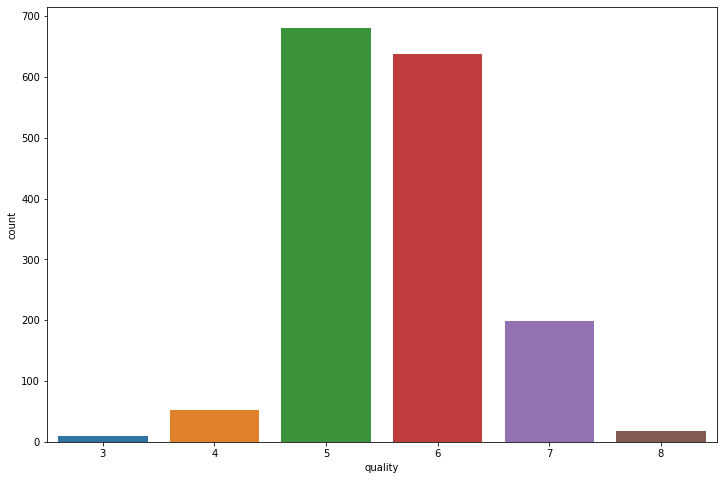

In [130]:
wdf['quality'].value_counts()

plt.figure(figsize=(12,8))
sns.countplot(wdf['quality'])

So from above we can observe that there are very less values of 3, 4 & 8

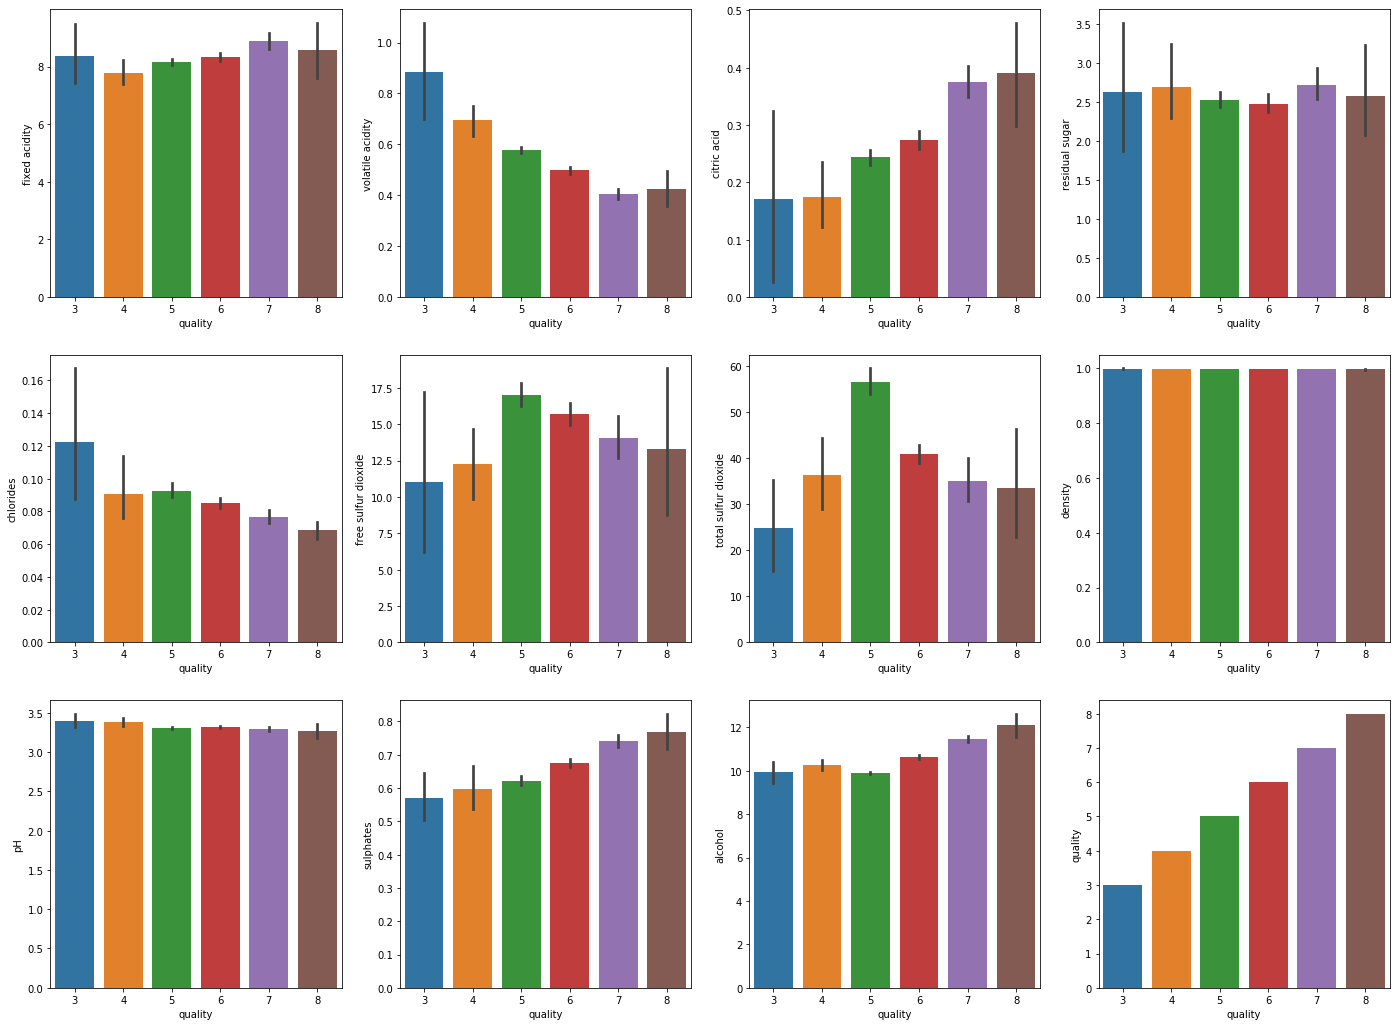

In [131]:
fig, ax1 = plt.subplots(3,4, figsize=(24 , 18))
k = 0
columns = list(wdf.columns)
for i in range(3):
    for j in range(4):
            sns.barplot(wdf['quality'], wdf[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

Plotting Boxplot with respect to the target variable for each column 

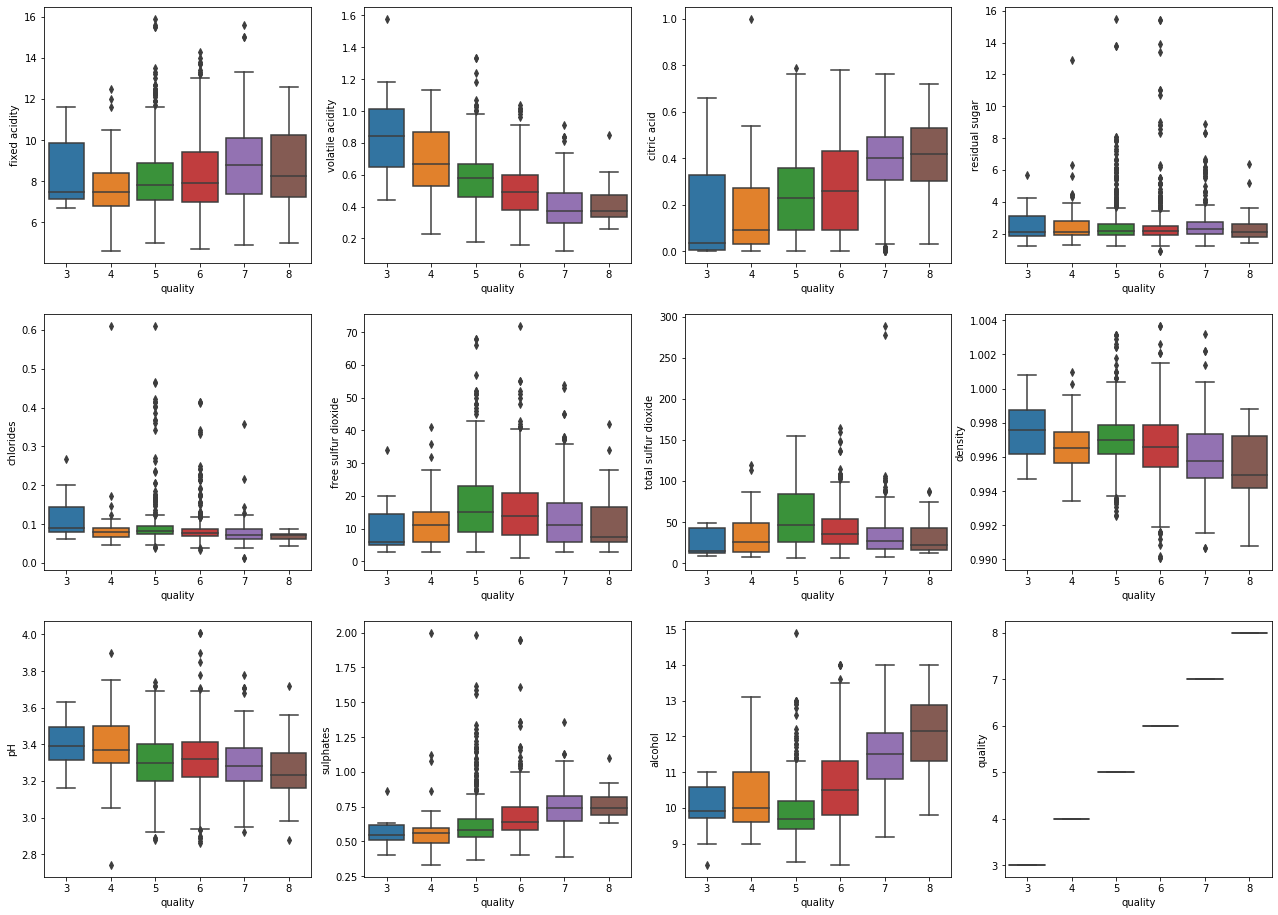

In [132]:
fig, ax1 = plt.subplots(3,4, figsize=(22,16))
k = 0
columns = list(wdf.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(wdf['quality'], wdf[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

**Visualizing outliers**

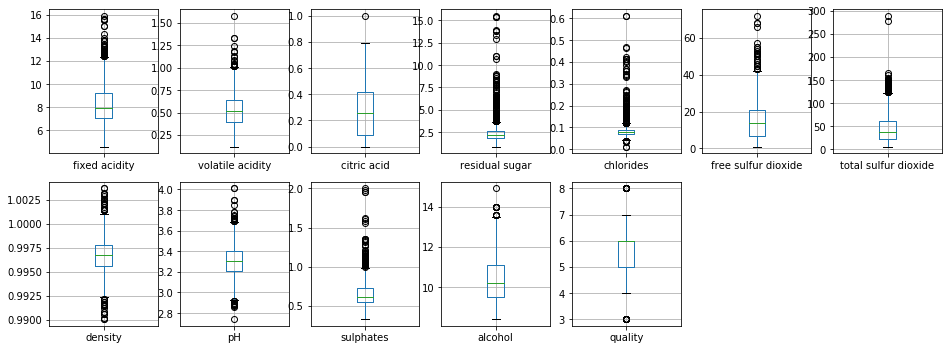

In [133]:
wdf.plot( kind = 'box' , subplots = True , layout = (3,7) , figsize = (16,9) , grid = True )
plt.show()

**Finding Zscore of the dataframe**

In [134]:
z_score = np.abs(zscore(wdf))
z_score

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

**Filtering datas with zscore < 3**

In [135]:
wdf_new = wdf[(z_score<3).all(axis = 1)]
wdf_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
16              8.5             0.280         0.56            1.80      0.092   
18              7.4             0.590         0.08            4.40      0.086   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
30              6.7             0.675         0.07            2.40      0.089   
31              6.9             0.685         0.00            2.50      0.105   
32              8.3             0.655         0.12            2.30      0.083   
34              5.2             0.320         0.25            1.80      0.103   
35              7.8             0.645         0.00            5.50      0.086   
36              7.8             0.600         0.14            2.40      0.086   
37              8.1             0.380         0.28            2.10      0.066   
39              7.3             0.450         0.36            5.90      0.074   
40              7.3             0.450         0.36            5.90      0.074   
41              8.8             0.610         0.30            2.80      0.088   
44              6.8             0.670         0.02            1.80      0.050   
46              7.7             0.935         0.43            2.20      0.114   
47              8.7             0.290         0.52            1.60      0.113   
48              6.4             0.400         0.23            1.60      0.066   
49              5.6             0.310         0.37            1.40      0.074   
50              8.8             0.660         0.26            1.70      0.074   
51              6.6             0.520         0.04            2.20      0.069   
52              6.6             0.500         0.04            2.10      0.068   
53              8.6             0.380         0.36            3.00      0.081   
54              7.6             0.510         0.15            2.80      0.110   
55              7.7             0.620         0.04            3.80      0.084   
56             10.2             0.420         0.57            3.40      0.070   
58              7.8             0.590         0.18            2.30      0.076   
59              7.3             0.390

**Plotting various columns to check their distributions**

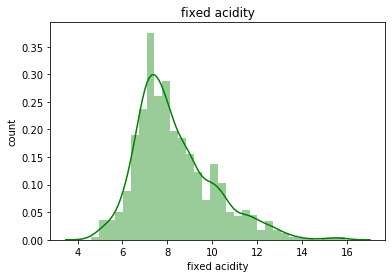

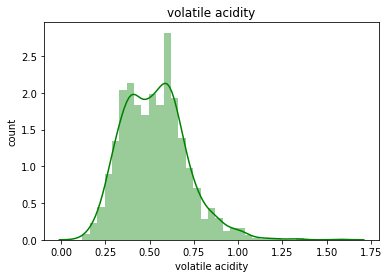

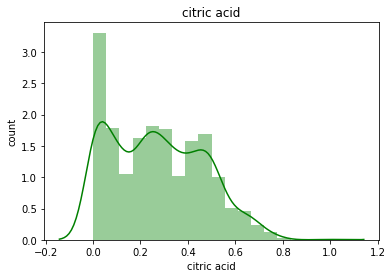

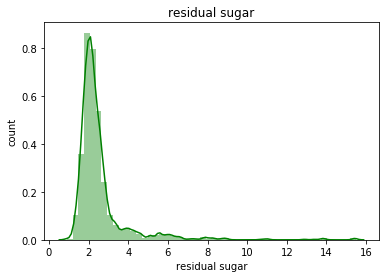

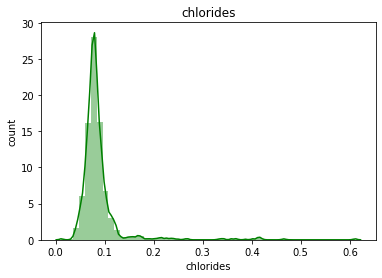

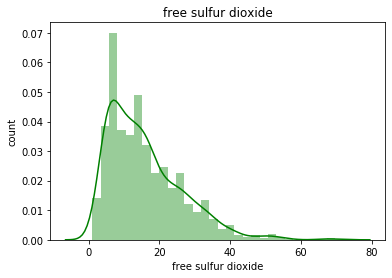

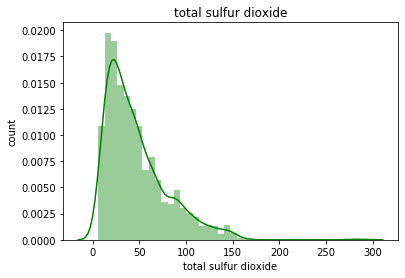

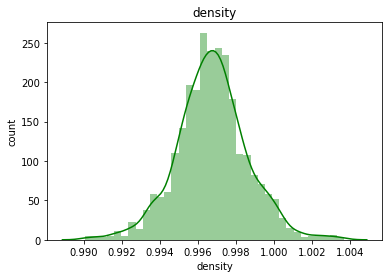

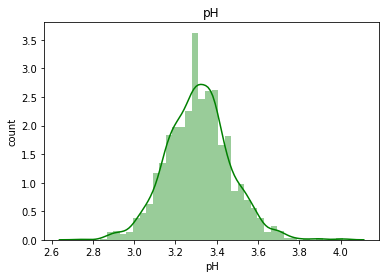

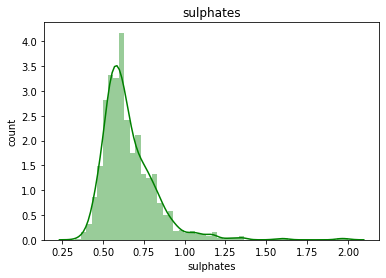

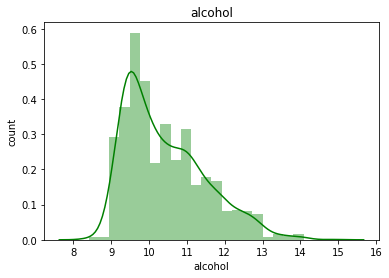

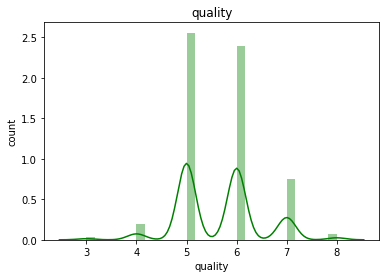

In [136]:
for feature in wdf :
    sns.distplot(wdf[feature] , kde = True , color = 'green' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

From above we observe that columns ["residual sugar"] , ["chlorides"] , ["free sulfur dioxide"] , ["total sulfur dioxide"] , ["sulphates"] are highly skewed .  So we need to remove their skewness.

**Taking their logs and creating a new DataFrame**

In [137]:
columns = (["residual sugar"] , ["chlorides"] , ["free sulfur dioxide"] , ["total sulfur dioxide"] , ["sulphates"])
for col in columns :
    wdf_new[col] = np.abs(np.log(wdf_new[col]))

In [138]:
wdf_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00        0.641854   2.577022   
1               7.8             0.880         0.00        0.955511   2.322788   
2               7.8             0.760         0.04        0.832909   2.385967   
3              11.2             0.280         0.56        0.641854   2.590267   
4               7.4             0.700         0.00        0.641854   2.577022   
5               7.4             0.660         0.00        0.587787   2.590267   
6               7.9             0.600         0.06        0.470004   2.673649   
7               7.3             0.650         0.00        0.182322   2.733368   
8               7.8             0.580         0.02        0.693147   2.617296   
9               7.5             0.500         0.36        1.808289   2.645075   
10              6.7             0.580         0.08        0.587787   2.333044   
11              7.5             0.500         0.36        1.808289   2.645075   
12              5.6             0.615         0.00        0.470004   2.419119   
16              8.5             0.280         0.56        0.587787   2.385967   
18              7.4             0.590         0.08        1.481605   2.453408   
20              8.9             0.220         0.48        0.587787   2.563950   
21              7.6             0.390         0.31        0.832909   2.501036   
22              7.9             0.430         0.21        0.470004   2.244316   
23              8.5             0.490         0.11        0.832909   2.476938   
24              6.9             0.400         0.14        0.875469   2.465104   
25              6.3             0.390         0.16        0.336472   2.525729   
26              7.6             0.410         0.24        0.587787   2.525729   
27              7.9             0.430         0.21        0.470004   2.244316   
28              7.1             0.710         0.00        0.641854   2.525729   
29              7.8             0.645         0.00        0.693147   2.501036   
30              6.7             0.675         0.07        0.875469   2.419119   
31              6.9             0.685         0.00        0.916291   2.253795   
32              8.3             0.655         0.12        0.832909   2.488915   
34              5.2             0.320         0.25        0.587787   2.273026   
35              7.8             0.645         0.00        1.704748   2.453408   
36              7.8             0.600         0.14        0.875469   2.453408   
37              8.1             0.380         0.28        0.741937   2.718101   
39              7.3             0.450         0.36        1.774952   2.603690   
40              7.3             0.450         0.36        1.774952   2.603690   
41              8.8             0.610         0.30        1.029619   2.430418   
44              6.8             0.670         0.02        0.587787   2.995732   
46              7.7             0.935         0.43        0.788457   2.171557   
47              8.7             0.290         0.52        0.470004   2.180367   
48              6.4             0.400         0.23        0.470004   2.718101   
49              5.6             0.310         0.37        0.336472   2.603690   
50              8.8             0.660         0.26        0.530628   2.603690   
51              6.6             0.520         0.04        0.788457   2.673649   
52              6.6             0.500         0.04        0.741937   2.688248   
53              8.6             0.380         0.36        1.098612   2.513306   
54              7.6             0.510         0.15        1.029619   2.207275   
55              7.7             0.620         0.04        1.335001   2.476938   
56             10.2             0.420         0.57        1.223775   2.659260   
58              7.8             0.590         0.18        0.832909   2.577022   
59              7.3             0.390

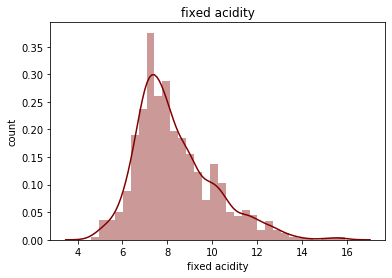

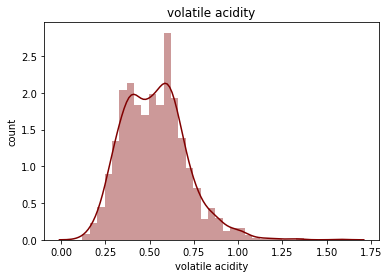

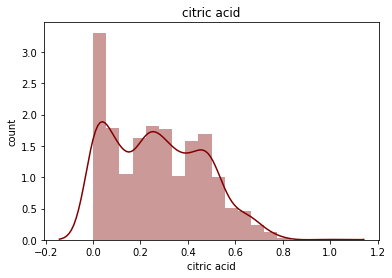

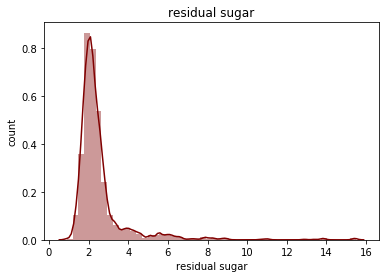

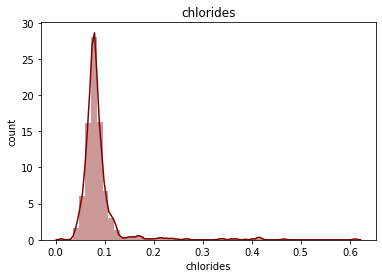

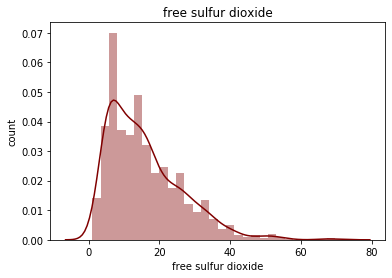

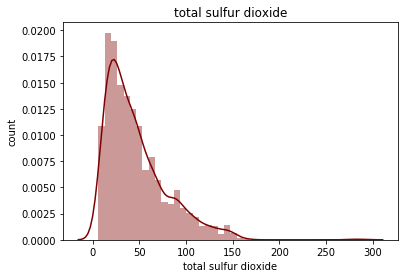

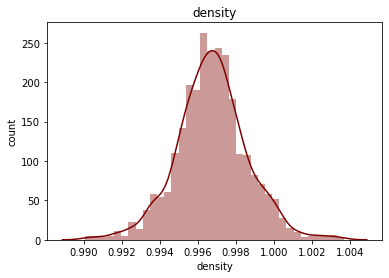

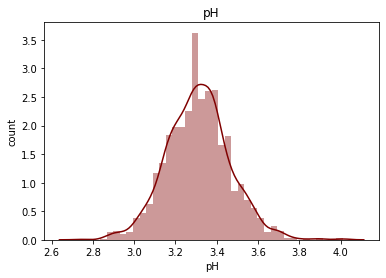

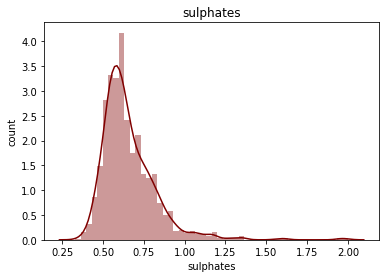

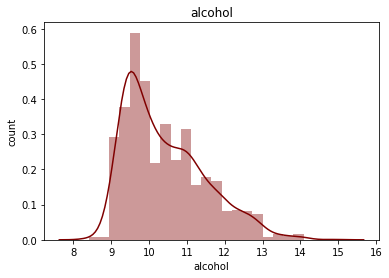

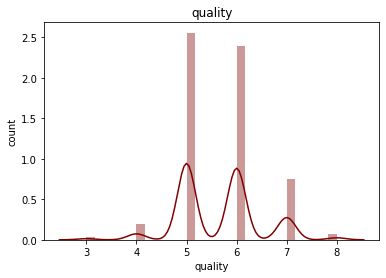

In [139]:
for feature in wdf :
    sns.distplot(wdf[feature] , kde = True , color = 'maroon' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

Here we have removed the skewness of the respective columns 

**Plotting Heatmap to check for correlations**

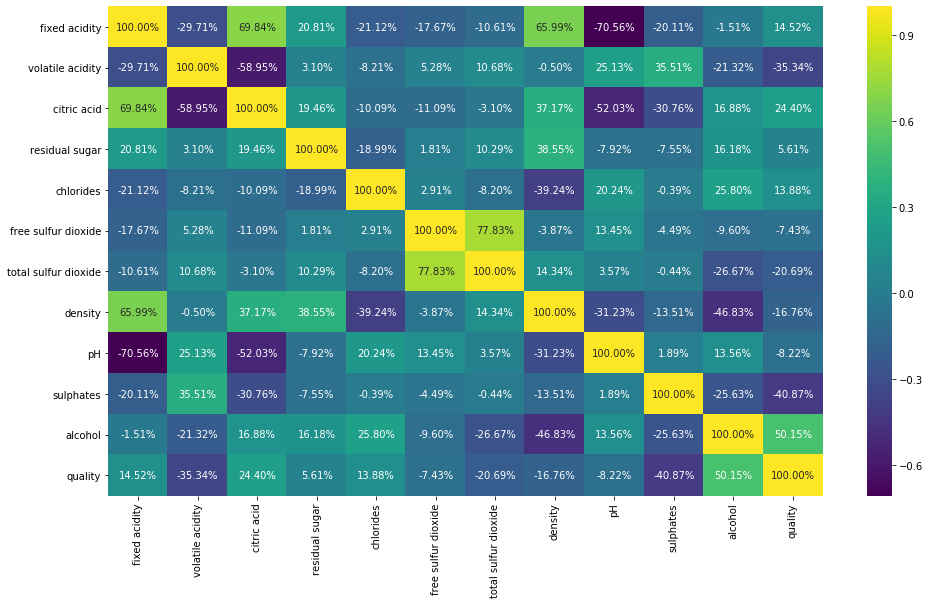

In [140]:
plt.figure(figsize = (16,9) )
sns.heatmap(wdf_new.corr() , annot = True , fmt = '.2%' , cmap = 'viridis')
plt.show()

 Checking for min & max values (ranges) for each column

In [141]:
for i in  wdf_new :
    print('\033[1m'+'MIN : ' , i , min(wdf_new[i]))
    print('\033[1m'+'MAX : ' , i , max(wdf_new[i]))

MIN :  fixed acidity 5.0
MAX :  fixed acidity 13.5
MIN :  volatile acidity 0.12
MAX :  volatile acidity 1.04
MIN :  citric acid 0.0
MAX :  citric acid 0.79
MIN :  residual sugar 0.1823215567939546
MAX :  residual sugar 1.9021075263969205
MIN :  chlorides 1.487220279709851
MAX :  chlorides 3.270169119255751
MIN :  free sulfur dioxide 0.0
MAX :  free sulfur dioxide 3.8501476017100584
MIN :  total sulfur dioxide 1.791759469228055
MAX :  total sulfur dioxide 4.976733742420574
MIN :  density 0.9915
MAX :  density 1.0022
MIN :  pH 2.88
MAX :  pH 3.75
MIN :  sulphates 0.0
MAX :  sulphates 1.1086626245216111
MIN :  alcohol 8.5
MAX :  alcohol 13.6
MIN :  quality 4
MAX :  quality 8


1.Volatile acidity and alchohol have high correlations with the target variable.

2.Here many independent features present that are actually highly dependent on the other independent feature.
Like ph and fixed acidity, ph and citric acid.   

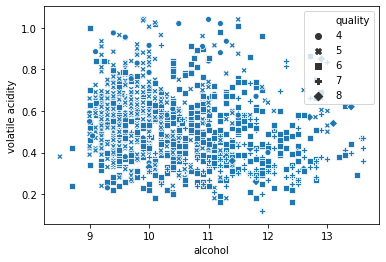

In [142]:
sns.scatterplot('alcohol','volatile acidity',style='quality',data=wdf_new)

In [143]:
wdf_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1451 non-null float64
volatile acidity        1451 non-null float64
citric acid             1451 non-null float64
residual sugar          1451 non-null float64
chlorides               1451 non-null float64
free sulfur dioxide     1451 non-null float64
total sulfur dioxide    1451 non-null float64
density                 1451 non-null float64
pH                      1451 non-null float64
sulphates               1451 non-null float64
alcohol                 1451 non-null float64
quality                 1451 non-null int64
dtypes: float64(11), int64(1)
memory usage: 147.4 KB


In [144]:
x = wdf_new.iloc[: , : -1]
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00        0.641854   2.577022   
1               7.8             0.880         0.00        0.955511   2.322788   
2               7.8             0.760         0.04        0.832909   2.385967   
3              11.2             0.280         0.56        0.641854   2.590267   
4               7.4             0.700         0.00        0.641854   2.577022   
5               7.4             0.660         0.00        0.587787   2.590267   
6               7.9             0.600         0.06        0.470004   2.673649   
7               7.3             0.650         0.00        0.182322   2.733368   
8               7.8             0.580         0.02        0.693147   2.617296   
9               7.5             0.500         0.36        1.808289   2.645075   
10              6.7             0.580         0.08        0.587787   2.333044   
11              7.5             0.500         0.36        1.808289   2.645075   
12              5.6             0.615         0.00        0.470004   2.419119   
16              8.5             0.280         0.56        0.587787   2.385967   
18              7.4             0.590         0.08        1.481605   2.453408   
20              8.9             0.220         0.48        0.587787   2.563950   
21              7.6             0.390         0.31        0.832909   2.501036   
22              7.9             0.430         0.21        0.470004   2.244316   
23              8.5             0.490         0.11        0.832909   2.476938   
24              6.9             0.400         0.14        0.875469   2.465104   
25              6.3             0.390         0.16        0.336472   2.525729   
26              7.6             0.410         0.24        0.587787   2.525729   
27              7.9             0.430         0.21        0.470004   2.244316   
28              7.1             0.710         0.00        0.641854   2.525729   
29              7.8             0.645         0.00        0.693147   2.501036   
30              6.7             0.675         0.07        0.875469   2.419119   
31              6.9             0.685         0.00        0.916291   2.253795   
32              8.3             0.655         0.12        0.832909   2.488915   
34              5.2             0.320         0.25        0.587787   2.273026   
35              7.8             0.645         0.00        1.704748   2.453408   
36              7.8             0.600         0.14        0.875469   2.453408   
37              8.1             0.380         0.28        0.741937   2.718101   
39              7.3             0.450         0.36        1.774952   2.603690   
40              7.3             0.450         0.36        1.774952   2.603690   
41              8.8             0.610         0.30        1.029619   2.430418   
44              6.8             0.670         0.02        0.587787   2.995732   
46              7.7             0.935         0.43        0.788457   2.171557   
47              8.7             0.290         0.52        0.470004   2.180367   
48              6.4             0.400         0.23        0.470004   2.718101   
49              5.6             0.310         0.37        0.336472   2.603690   
50              8.8             0.660         0.26        0.530628   2.603690   
51              6.6             0.520         0.04        0.788457   2.673649   
52              6.6             0.500         0.04        0.741937   2.688248   
53              8.6             0.380         0.36        1.098612   2.513306   
54              7.6             0.510         0.15        1.029619   2.207275   
55              7.7             0.620         0.04        1.335001   2.476938   
56             10.2             0.420         0.57        1.223775   2.659260   
58              7.8             0.590         0.18        0.832909   2.577022   
59              7.3             0.390

In [145]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1598
Data columns (total 11 columns):
fixed acidity           1451 non-null float64
volatile acidity        1451 non-null float64
citric acid             1451 non-null float64
residual sugar          1451 non-null float64
chlorides               1451 non-null float64
free sulfur dioxide     1451 non-null float64
total sulfur dioxide    1451 non-null float64
density                 1451 non-null float64
pH                      1451 non-null float64
sulphates               1451 non-null float64
alcohol                 1451 non-null float64
dtypes: float64(11)
memory usage: 136.0 KB


In [146]:
y = wdf_new.iloc[: , -1:]
y

quality
0           5
1           5
2           5
3           6
4           5
5           5
6           5
7           7
8           7
9           5
10          5
11          5
12          5
16          7
18          4
20          6
21          5
22          5
23          5
24          6
25          5
26          5
27          5
28          5
29          6
30          5
31          6
32          5
34          5
35          6
36          6
37          7
39          5
40          5
41          4
44          5
46          5
47          5
48          5
49          5
50          5
51          6
52          6
53          5
54          6
55          5
56          5
58          5
59          6
60          5
61          5
62          7
63          5
64          5
65          5
66          5
67          5
68          5
69          6
70          6
71          5
72          5
73          4
74          5
75          5
76          5
77          6
78          5
79          4
80          5
82          5
84          6
85          5
87          5
89          5
90          5
93          5
94          4
96          5
97          5
98          5
99          6
100         6
101         6
102         6
103         5
104         5
105         5
107         5
108         6
110         5
111         5
112         5
113         6
114         5
115         6
116         6
117         6
118         6
119         6
121         6
122         5
123         5
124         5
125         5
128         7
129         5
130         5
131         5
132         5
133         6
134         6
135         5
136         5
137         5
138         5
139         5
140         5
141         5
143         5
145         5
146         5
148         6
149         6
150         6
152         5
153         5
154         5
155         5
156         5
157         5
158         5
159         6
160         5
161         4
162         6
165         5
166         5
167         4
168         6
170         4
171         6
172         6
173         6
174         5
175         5
176         5
177         6
178         5
179         5
180         5
182         5
183         5
184         6
185         5
186         5
187         5
188         5
189         5
190         5
191         6
192         5
193         5
194         5
195         5
196         5
197         6
198         7
200         7
201         5
202         5
203         5
204         6
205         7
206         7
207         5
208         5
209         7
210         6
211         6
212         6
213         5
214         6
215         5
216         5
217         5
218         5
219         5
220         6
221         5
222         5
223         6
224         4
225         6
227         5
228         6
229         5
230         7
231         6
232         6
233         5
234         6
235         6
236         6
237         6
238         6
239         6
241         6
242         6
245         6
246         5
247         5
248         6
249         6
250         6
251         6
252         5
253         5
254         6
255         5
256         5
257         5
259         7
260         5
261         4
262         5
263         5
264         5
265         7
266         4
267         8
268         6
269         6
270         6
271         6
272         5
273         5
275         6
276         6
277         6
278         8
279         7
280         6
282         5
283         7
284         5
285         5
286         6
287         6
288         7
289         5
290         7
292         6
293         6
294         6
295         5
296         5
297         5
298         5
299         5
300         6
301         6
302         5
303         5
304         5
305         6
306         5
307         6
308         6
309         6
310         6
311         6
312         6
313         5
314         5
315         6
316         5
317         6
318         7
319         6
320         7
321         5
322         5
323         6
326         7
32

**Scaling the dataset so that the variations(ranges) would be reduced**

In [147]:
scaler = MinMaxScaler()
x  = scaler.fit_transform(x)
x

array([[0.28235294, 0.63043478, 0.        , ..., 0.72413793, 0.52298912,
        0.17647059],
       [0.32941176, 0.82608696, 0.        , ..., 0.36781609, 0.3478628 ,
        0.25490196],
       [0.32941176, 0.69565217, 0.05063291, ..., 0.43678161, 0.38856087,
        0.25490196],
       ...,
       [0.15294118, 0.42391304, 0.16455696, ..., 0.62068966, 0.25948568,
        0.49019608],
       [0.10588235, 0.57065217, 0.15189873, ..., 0.79310345, 0.30892203,
        0.33333333],
       [0.11764706, 0.20652174, 0.59493671, ..., 0.5862069 , 0.3747898 ,
        0.49019608]])

**Splitting the dataset & finding the best random state**

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)
    

Best accuracy is  0.658256880733945 on random state  173


In [149]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.30,random_state=173)

In [150]:
print("X_train.shape" , X_train.shape)
print("X_test.shape" , X_test.shape)
print("Y_train.shape" , Y_train.shape)
print("Y_test.shape" , Y_test.shape)

X_train.shape (1015, 11)
X_test.shape (436, 11)
Y_train.shape (1015, 1)
Y_test.shape (436, 1)


**Finding scores for various models**

In [151]:
def rmse_cv(model, x_train, y):
    rmse =- (cross_val_score(model, x_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),]

names = ['LR','KN','svc','RF','AB','DT']

for model,name in zip(models,names):
    fit = model.fit(x_train , y_train)
    score = model.score(x_train , y_train)
    print(name ," - " ,score)

LR  -  0.5950738916256157
KN  -  0.723152709359606
svc  -  0.5901477832512315
RF  -  0.9852216748768473
AB  -  0.4009852216748768
DT  -  1.0


From above we have observed that Decision Tree and Random Forest has the best scores .

**Random Forest Classifier**

In [152]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [153]:
y_predict1 = rf.predict(x_test)

In [154]:
from sklearn import metrics
print("Accuracy:",accuracy_score(y_test, y_predict1))

Accuracy: 0.6490825688073395


**Decision Tree Classifier**

In [155]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [156]:
y_predict2= dtc.predict(x_test)

In [157]:
from sklearn import metrics
print("Accuracy:",accuracy_score(y_test, y_predict2))

Accuracy: 0.5825688073394495


In [158]:
confusion_mat = confusion_matrix(y_test , y_predict2)
print(confusion_mat)

[[  0   8   5   1   0]
 [  5 122  62   8   0]
 [  4  40  99  16   4]
 [  0   5  19  33   3]
 [  0   0   0   2   0]]


In [159]:
precision = metrics.precision_score(y_test , y_predict2 , average = None)
precision

array([0.        , 0.69714286, 0.53513514, 0.55      , 0.        ])

**Metrics Report**

In [160]:
print(metrics.classification_report(y_test , y_predict2))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.70      0.62      0.66       197
           6       0.54      0.61      0.57       163
           7       0.55      0.55      0.55        60
           8       0.00      0.00      0.00         2

    accuracy                           0.58       436
   macro avg       0.36      0.36      0.35       436
weighted avg       0.59      0.58      0.58       436



In [161]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dtc,x_train,y_train,cv=5)
print("Cross validation score for is ", scr.mean())

Cross validation score for is  0.5871466777933281


In [162]:
from sklearn.model_selection import GridSearchCV
grid_values = {'n_estimators': [10, 30, 50, 100],
               'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
               'max_depth' : [4,5,6,7,8],
              }
grid = GridSearchCV(RandomForestClassifier() , param_grid = grid_values, scoring = 'accuracy')
grid.fit(x_train , y_train)
grid_predict = grid.predict(x_test)
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)

Best Score:  0.6561576354679803
Best Params:  {'max_depth': 8, 'max_features': 0.5, 'n_estimators': 100}


In [163]:
print(classification_report(y_test, grid_predict))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.74      0.72      0.73       197
           6       0.55      0.72      0.63       163
           7       0.73      0.40      0.52        60
           8       0.00      0.00      0.00         2

    accuracy                           0.65       436
   macro avg       0.40      0.37      0.37       436
weighted avg       0.64      0.65      0.63       436



In [164]:
from sklearn.model_selection import GridSearchCV
grid_values = {'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
               'max_depth' : [4,5,6,7,8],}
grid = GridSearchCV(DecisionTreeClassifier() , param_grid = grid_values, scoring = 'accuracy')
grid.fit(x_train , y_train)
grid_predict1 = grid.predict(x_test)
grid_predict2 = grid.predict(x_test)
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)

Best Score:  0.5911330049261084
Best Params:  {'max_depth': 7, 'max_features': 0.5}


In [165]:
import joblib
joblib.dump(rf,'Wine Q Pred.obj')

['Wine Q Pred.obj']